In [345]:
#Load packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [346]:
#Import csv dataset
productivity = pd.read_csv('garments_worker_productivity.csv')
productivity

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [347]:
#Check the data type
productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [348]:
#Looking at the shape
productivity.shape

(1197, 15)

In [349]:
!pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable


Now, we will import packages to load the data into an SQL database.

In [350]:
#Import packages
from sqlalchemy import create_engine

In [351]:
#Information from PostgreSQL
host = r'localhost' 
db = r'MSDS610' 
user = r'postgres' 
pw = r'82328' 
port = r'5432' 
schema = r'week2' 

In [352]:
db_conn = create_engine("postgresql://{}:{}@{}:{}/{}".format(user, pw, host, port, db))

In [353]:
sql="select tables.table_name from information_schema.tables where (table_schema ='"+schema+"')order by 1;"
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,productivity_data


In [354]:
table_name = r'productivity_data'

In [355]:
productivity.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

1197

In [356]:
tbl_df = pd.read_sql(sql, db_conn, index_col=None)
tbl_df

,table_name
0,productivity_data


In [357]:
#Verifying SQL database
sql=f'SELECT * FROM ' + schema + '.' + table_name
productivity_check = pd.read_sql(sql, db_conn, index_col=None)

## Week 3 

### Cleaning data

In [358]:
#Creating a copy of the dataset
clean_productivity = productivity_check.copy()

In [359]:
#Checking the data
clean_productivity.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428


#### There is some categorical data, for our analysis we need numerical so we will convert the categorical columns into numerical data.

In [360]:
#Converting categorical data to numerical data.
clean_productivity['quarter'] = clean_productivity['quarter'].replace({'Quarter1':1, 'Quarter2':2, 'Quarter3':3, 'Quarter4':4, 'Quarter5':5})

In [361]:
#Converting categorical data to numerical data.
clean_productivity['department'] = clean_productivity['department'].replace({'finishing ':0,'finishing':0, 'sweing':1})

In [362]:
#Converting categorical data to numerical data.
clean_productivity['day'] = clean_productivity['day'].replace({'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Saturday':5})

In [363]:
#Ensuring the data is numerical
clean_productivity.dtypes

date                      object
quarter                    int64
department                 int64
day                        int64
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [364]:
#Confirming that categorical data is numerical
clean_productivity

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,0,4,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,2,0,3,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,2,0,3,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,2,0,3,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,2,0,3,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


### Now, we will look for missing values

In [365]:
#Calculating the percentage of missing values
missing = clean_productivity.isnull().sum().sort_values(ascending=False)/len(clean_productivity)*100
missing

wip                      42.272348
date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

#### Wip column has 42% of missing values, it is almost half of our data. It is decided to remove that column.

In [366]:
#Dropping the wip column
clean_productivity = clean_productivity.drop(['wip'], axis=1)
clean_productivity.head()

,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,1,1,4,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,1,0,4,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,1,1,4,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,1,1,4,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,1,1,4,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382


In [367]:
#Confirming the wip column has been dropped
missing = clean_productivity.isnull().sum().sort_values(ascending=False)/len(clean_productivity)*100
missing

date                     0.0
quarter                  0.0
department               0.0
day                      0.0
team                     0.0
targeted_productivity    0.0
smv                      0.0
over_time                0.0
incentive                0.0
idle_time                0.0
idle_men                 0.0
no_of_style_change       0.0
no_of_workers            0.0
actual_productivity      0.0
dtype: float64

### Now, we will look for any outliers

#### We will start by looking at the statistics in our data.

In [368]:
#Cheking the data
clean_productivity.describe()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2.399332,0.577277,2.469507,6.426901,0.729632,15.062172,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,1.215535,0.494199,1.694506,3.463963,0.097891,10.943219,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.000000,0.000000,1.000000,0.070000,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,1.000000,0.000000,1.000000,3.000000,0.700000,3.940000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2.000000,1.000000,2.000000,6.000000,0.750000,15.260000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,3.000000,1.000000,4.000000,9.000000,0.800000,24.260000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,5.000000,1.000000,5.000000,12.000000,0.800000,54.560000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


#### The highest outliers based on the columns' standard deviation seem to be over_time, and incentive, followed by no_of_workers. We will proceed to create boxplots to confirm this.

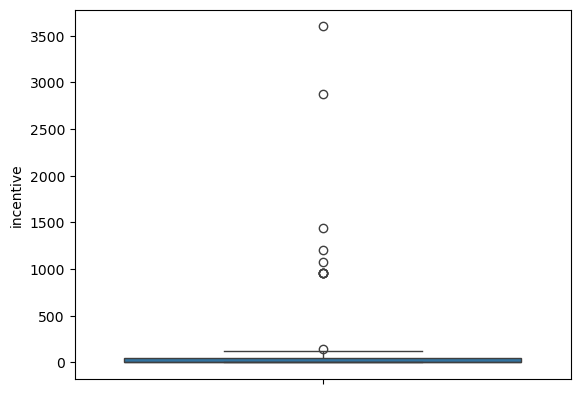

In [369]:
# Create a boxplot
sns.boxplot(data=clean_productivity['incentive'])
plt.show()

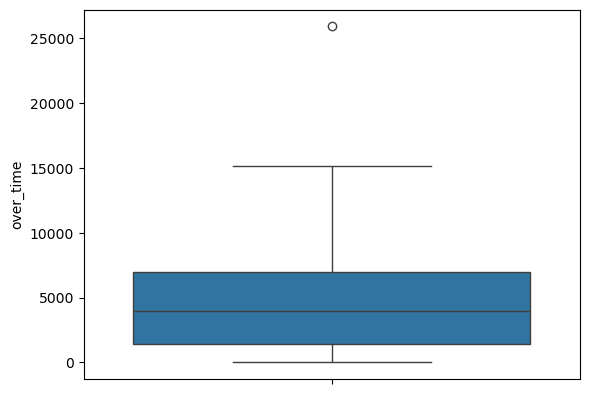

In [370]:
# Create a boxplot
sns.boxplot(data=clean_productivity['over_time'])

plt.show()

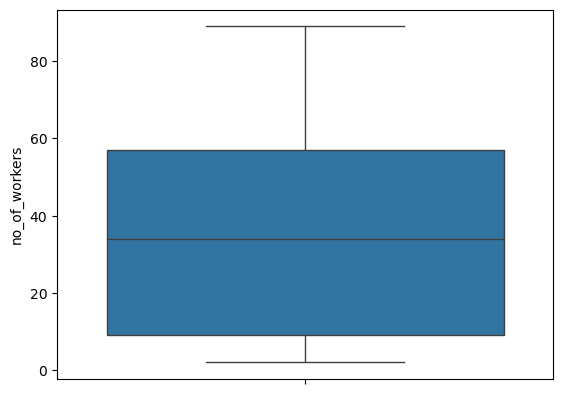

In [371]:
# Create a boxplot
sns.boxplot(data=clean_productivity['no_of_workers'])

plt.show()

#### The boxplots are confirming the outliers from the descriptive statistics.

### Proceed to save the data into a SQL table

In [372]:
table_name = r'productivity_cleaned'
schema = r'cleaned' 

clean_productivity.to_sql(table_name, con=db_conn, if_exists='replace', index=False, schema=schema, chunksize=1000, method='multi')

1197